# 삼성전자 ML 이해 및 구현 파이널 프로젝트
# 반도체 공정 데이터를 바탕으로 한 분류 모델링 및 공정분석
> - 데이터셋 설명  
>> UCI SECOM 반도체 공정 데이터셋  
데이터 출처 [https://archive.ics.uci.edu/ml/datasets/SECOM](https://archive.ics.uci.edu/ml/datasets/SECOM)  
총 1576샘플, 590개 공정데이터를 컬럼 값으로 갖는 데이터 및 1576개의 완제품의 불량 여부 레이블 데이터가 존재.  
전처리 된 불량 여부 레이블은 정상데이터는 0, 불량데이터는 1이다.  
각 컬럼은 반도체 생산 공정 설비에서 수집된 데이터이며 2008년 7월 19일부터 2008년 10월 17일에 걸쳐 수집 된 데이터이다.

> - 목적
>> 단순 완제품 불량 여부 분류를 위한 머신러닝 분류 모델링이 목적이 아님.  
머신러닝 모델이 어떠한 공정데이터(변수)가 불량 판별에 가장 영향을 많이 준 공정인지를 파악하는 목적으로 진행한다.  
이를 바탕으로 불량에 가장 많은 영향을 주는 공정을 파악하고 예지보전을 통해 완제품 수율개선에 기여할 수 있다.  

> - 진행방식
>> 아래 굵은 글씨로 작성 되어있는 테스트를 수행하며 테스크 아래 수행 결과값과 비교하며 프로젝트를 진행한다.  
코드 실행 결과값이 없을 경우 # 결과값 없음, 코드 실행 결과가 결과값이랑 다를 수 있는 경우 # 결과값 다를 수 있음으로 가늠한다.

**필요모듈 import**

In [1]:
# 아래는 분석에 필요한 추가 옵션 설정을 위한 코드입니다.
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
pd.options.display.max_columns=600 # 최대표시 변수 갯수 설정 옵션
pd.options.display.max_info_columns=600 # info 최대표시 변수 갯수 설정 옵션

# CODE HERE 아래쪽으로 필요한 패키지를 import 합니다.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CODE HERE


## 데이터 로딩 및 확인

### 함께 제공 된 semiconductor.csv 파일을 읽어들여 df변수명으로 저장 후 첫 5개 샘플 데이터 확인  
원본데이터는 X, y 각각 링크형태로 제공하지만 편의를 위해 강사가 전처리를 진행한 데이터셋을 활용합니다

In [141]:
# CODE HERE
df = pd.read_csv('./semiconductor.csv')
df.head()

,datetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,target
0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0

,datetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,target
0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0

### 데이터프레임 shape확인

In [142]:
# CODE HERE
df.shape

(1567, 592)

(1567, 592)

### 데이터프레임의 간략한 정보 확인

In [143]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 592 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    datetime  1567 non-null   object 
 1    0         1561 non-null   float64
 2    1         1560 non-null   float64
 3    2         1553 non-null   float64
 4    3         1553 non-null   float64
 5    4         1553 non-null   float64
 6    5         1553 non-null   float64
 7    6         1553 non-null   float64
 8    7         1558 non-null   float64
 9    8         1565 non-null   float64
 10   9         1565 non-null   float64
 11   10        1565 non-null   float64
 12   11        1565 non-null   float64
 13   12        1565 non-null   float64
 14   13        1564 non-null   float64
 15   14        1564 non-null   float64
 16   15        1564 non-null   float64
 17   16        1564 non-null   float64
 18   17        1564 non-null   float64
 19   18        1564 non-null   float64
 20   19    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 592 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    datetime  1567 non-null   object 
 1    0         1561 non-null   float64
 2    1         1560 non-null   float64
 3    2         1553 non-null   float64
 4    3         1553 non-null   float64
 5    4         1553 non-null   float64
 6    5         1553 non-null   float64
 7    6         1553 non-null   float64
 8    7         1558 non-null   float64
 9    8         1565 non-null   float64
 10   9         1565 non-null   float64
 11   10        1565 non-null   float64
 12   11        1565 non-null   float64
 13   12        1565 non-null   float64
 14   13        1564 non-null   float64
 15   14        1564 non-null   float64
 16   15        1564 non-null   float64
 17   16        1564 non-null   float64
 18   17        1564 non-null   float64
 19   18        1564 non-null   float64
 20   19    

시간데이터를 포함한 각 공정데이터가 변수데이터로 구성되어있으며 총 591개의 변수와 1개의 타겟 데이터를 가지고 있는 데이터셋임을 확인했습니다.  
각 변수에는 결측데이터가 포함되어 있으며 결측 비율이 높은 변수가 존재함을 확인하였습니다.  
샘플데이터의 레이블 값인 target 컬럼데이터를 조금 더 살펴보겠습니다.

## 타겟데이터 분포 및 불량률 계산

이번 프로젝트의 y값인 완성품의 불량여부는 데이터셋의 'target' 컬럼입니다. 해당 데이터의 구조적 특징을 살펴보겠습니다.

### 타겟데이터의 고윳값 확인

In [144]:
# CODE HERE
df['target'].unique()

array([0, 1], dtype=int64)

array([0, 1])

양품데이터는 0, 불량데이터는 1로 전처리가 되어있음을 확인했습니다. 정상데이터와 불량데이터의 비율을 확인해보겠습니다.

### 양품 데이터 갯수 및 불량 데이터 갯수 확인

In [145]:
# CODE HERE
df['target'].value_counts()

0    1463
1     104
Name: target, dtype: int64

양품데이터 : 1463개
불량데이터 : 104개


### 불량률을 계산 해 봅시다.

In [146]:
# CODE HERE
df['target'].mean() * 100

6.636885768985322

불량률 : 6.636885768985322%


비율로 확인해본 결과 불량데이터의 수가 절대적으로 부족합니다. 현업 문제에서는 굉장히 빈번하게 발생하는 문제입니다.  
앞으로 수행할 모델링에도 임발란스 한 타겟데이터가 모델링을 힘들게 할 수 있습니다. 이는 어떻게 처리할지 생각해 보아야 할 문제입니다.

## 데이터의 특이점 시각화로 확인 및 데이터 처리

현재 데이터에 많은 변수들이 있어 모델링 전 선별과정을 통해 불필요한 변수 유무를 확인하고 이를 제거하는 작업을 해보겠습니다.  
아래 시각화를 통해 변수의 상관계수를 출력해보겠습니다.

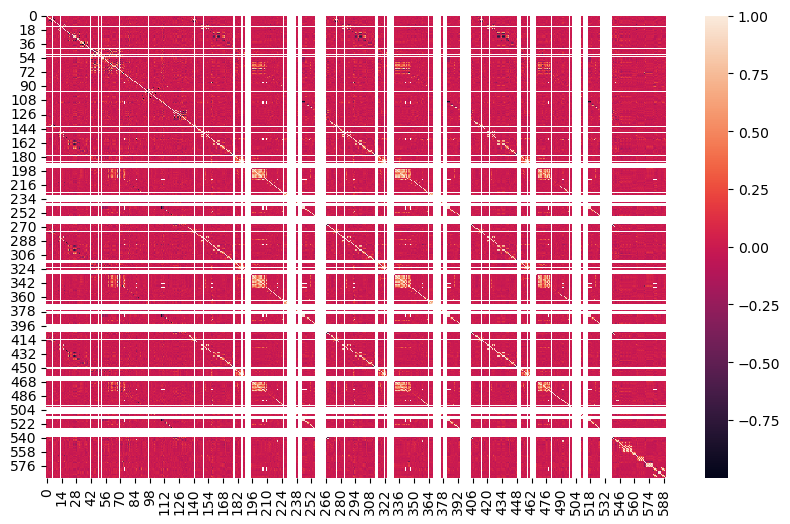

In [147]:
# CODE 제공 그대로 실행시키시면 됩니다.
# 단 원본데이터의 변수명은 df로 원본데이터 변수명이 다르다면 변수명을 수정해주세요.
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()) # 상관계수 행렬 시각화
plt.show()

상관계수 시각화의 목적은 target데이터에 영향을 주는 변수를 선별하기 위한 목적과 함께, 변수간 영향을 주고 받는 변수를 확인하기 위함도 있습니다.  
위 시각화 그래프에서 흰색선의 경우 자기상관에 해당하는 수치입니다. 즉 변수의 데이터의 값이 동일한 변수가 많은 상태입니다.  
이러한 변수들은 분석 과정에서 모델에 노이즈를 줄 수 있는 데이터이기에 해당 변수들의 갯수 및 위치를 파악 해 삭제 처리 하겠습니다.

### 변수 삭제 전 고윳값이 하나(변수의 데이터가 모두 동일한)인 변수를 모두 선택하고 데이터를 확인합니다.(난이도 높음)

2일 차 연습문제 중 데이터타입에 따른 변수선택 방법 중 반복문을 활용한 변수 선택 방법을 참고 하셔야 합니다.  
다만 작업 난이도가 높아 패스하셔도 이후 진행에는 문제가 없습니다.  
고윳값의 갯수는 nunique() 판다스 메소드로 확인 가능합니다.

In [148]:
# CODE HERE
df.nunique()

datetime    1534
0           1520
1           1504
2            507
3            518
            ... 
586          322
587          260
588          120
589          611
target         2
Length: 592, dtype: int64

,5,13,42,49,52,69,97,141,149,178,179,186,189,190,191,192,193,194,226,229,230,231,232,233,234,235,236,237,240,241,242,243,256,257,258,259,260,261,262,263,264,265,266,276,284,313,314,315,322,325,326,327,328,329,330,364,369,370,371,372,373,374,375,378,379,380,381,394,395,396,397,398,399,400,401,402,403,404,414,422,449,450,451,458,461,462,463,464,465,466,481,498,501,502,503,504,505,506,507,508,509,512,513,514,515,528,529,530,531,532,533,534,535,536,537,538
0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1563,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### 위에서 확인 한 116개의 변수 제거 후 나머지 변수만을 선택하여 원본데이터에 다시 저장(할당)하고 shape을 확인합니다.
위에서 작성한 코드를 활용하셔도 좋고 위 작업이 너무 어렵다면 정답 출력 결과에서 확인 된 변수를 수작업으로 삭제하셔도 좋습니다.  
각자가 구현할 수 있는 방법으로 작업을 수행합니다.

In [149]:
df = df.drop(['5','13','42','49','52','69','97','141','149','178','179','186','189','190','191','192','193','194','226','229','230','231','232','233','234','235','236','237','240','241','242','243','256','257','258','259','260','261','262','263','264','265','266','276','284','313','314','315','322','325','326','327','328','329','330','364','369','370','371','372','373','374','375','378','379','380','381','394','395','396','397','398','399','400','401','402','403','404','414','422','449','450','451','458','461','462','463','464','465','466','481','498','501','502','503','504','505','506','507','508','509','512','513','514','515','528','529','530','531','532','533','534','535','536','537','538'], axis=1)
df.to_csv('./semiconductor.csv',index=False)
df

,datetime,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,238,239,244,245,246,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,365,366,367,368,376,377,382,383,384,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,499,500,510,511,516,517,518,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,target
0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,624.3145,218.3174,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,20.95,0.333,12.49,16.713,0.0803,5.72,11.19,65.363,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.0400,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0744,0.0546,0.0027,0.0040,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,2.5883,0.0010,0.0319,0.0197,0.0120,0.0109,3.9321,1.5123,3.5811,0.1337,0.0055,3.8447,0.1077,0.0167,NaN,NaN,418.1363,398.3185,496.1582,158.3330,0.0373,0.0202,0.0462,0.6083,0.3032,0.0200,0.0174,0.2827,0.0434,0.1342,0.2419,0.1343,0.3670,0.1431,0.0610,6.2698,0.1181,3.8208,5.3737,0.0254,1.6252,3.2461,18.0118,0.0752,1.5989,6.5893,0.0913,3.0911,8.4654,1.5989,1.2293,5.3406,0.0867,2.8551,0.0,2.9971,31.8843,NaN,NaN,0.0,0.0215,0.0274,0.0315,0.0238,0.0206,0.0238,0.0144,0.0491,1.2708,0.0004,NaN,0.0229,0.0065,55.2039,0.0105,560.2658,0.0170,0.0148,

In [150]:
# CODE HERE
df.shape

(1567, 476)

(1567, 476)

sns.heatmap() 함수를 활용하여 정상/불량 데이터의 각각의 결측치를 시각화 해 보았습니다.  
plt.subplot은 시각화 영역을 설정한 행렬 기준으로 나누어 주는 함수입니다. 아래 결과값의 1행은 정상데이터 2행은 불량데이터입니다.  
해당 작업은 결측치 유무에 따른 불량발생 패턴이 있는지 확인하는 목적으로 수행 하였습니다.  

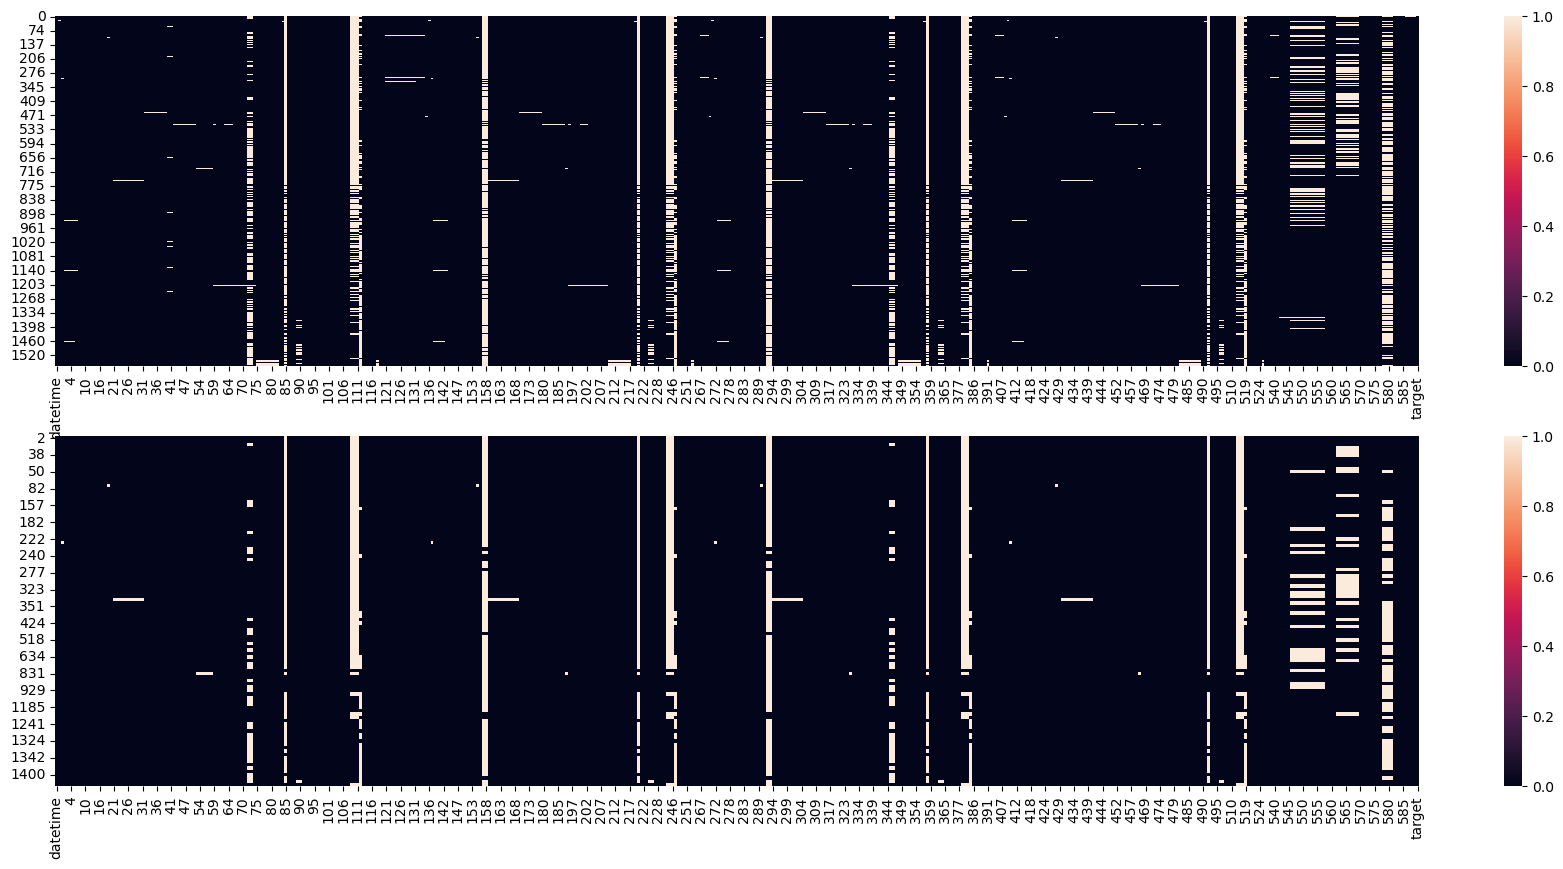

In [151]:
# CODE 제공 그대로 실행시키시면 됩니다.
# 단 원본데이터의 변수명은 df로 원본데이터 변수명이 다르다면 변수명을 수정해주세요.
plt.figure(figsize=(22, 10))# 그래프를 그리는 영역 크기 설정

plt.subplot(2, 1, 1) # 시각화 영역을 2행 1열로 설정, 1번 행에 해당하는 영역 설정하는 함수
sns.heatmap(df.loc[df['target'] == 0].isna()) # 정상데이터의 결측치 heatmap 코드

plt.subplot(2, 1, 2) # 시각화 영역을 2행 1열로 설정, 2번 행에 해당하는 영역 설정하는 함수
sns.heatmap(df.loc[df['target'] == 1].isna()) # 불량데이터의 결측치 heatmap 코드

plt.show()

정상, 불량 레이블에 따라 결측치 시각화를 진행해본 결과 결측치의 분포에 따라 불양 판정이 나뉘는 패턴은 보이지 않습니다.  
다만 결측치 비율이 높은 몇몇 공정데이터가 확인되어 이를 처리하는 과정을 진행해주어야 할 것 같습니다.  
일반적인 머신러닝 모델의 경우 데이터셋에 결측치가 존재하면 모델 학습에 사용이 불가능하기에 결측치를 다양한 방법으로 처리합니다.  

### 각 변수의 결측치 비율이 60% 이상인 변수를 선택하고 해당 변수를 호출(출력) 해보겠습니다.

In [2]:
df = pd.read_csv('./semiconductor.csv')
df

,datetime,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,238,239,244,245,246,247,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,365,366,367,368,376,377,382,383,384,385,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,499,500,510,511,516,517,518,519,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,target
0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,624.3145,218.3174,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,20.95,0.333,12.49,16.713,0.0803,5.72,11.19,65.363,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.0400,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0744,0.0546,0.0027,0.0040,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,2.5883,0.0010,0.0319,0.0197,0.0120,0.0109,3.9321,1.5123,3.5811,0.1337,0.0055,3.8447,0.1077,0.0167,NaN,NaN,418.1363,398.3185,496.1582,158.3330,0.0373,0.0202,0.0462,0.6083,0.3032,0.0200,0.0174,0.2827,0.0434,0.1342,0.2419,0.1343,0.3670,0.1431,0.0610,6.2698,0.1181,3.8208,5.3737,0.0254,1.6252,3.2461,18.0118,0.0752,1.5989,6.5893,0.0913,3.0911,8.4654,1.5989,1.2293,5.3406,0.0867,2.8551,0.0,2.9971,31.8843,NaN,NaN,0.0,0.0215,0.0274,0.0315,0.0238,0.0206,0.0238,0.0144,0.0491,1.2708,0.0004,NaN,0.0229,0.0065,55.2039,0.0105,560.2658,0.0170,0.0148,

In [3]:
df2 = df.isna()
x11 = df2.mean() * 100
x12 = x11 > 60
remove = df.loc[:, x12].columns
len(remove)

print(df.loc[:, x12].columns)

Index(['85', '109', '110', '111', '157', '158', '220', '244', '245', '246',
       '292', '293', '358', '382', '383', '384', '492', '516', '517', '518',
       '578', '579', '580', '581'],
      dtype='object')


['85',
 '109',
 '110',
 '111',
 '157',
 '158',
 '220',
 '244',
 '245',
 '246',
 '292',
 '293',
 '358',
 '382',
 '383',
 '384',
 '492',
 '516',
 '517',
 '518',
 '578',
 '579',
 '580',
 '581']

### 위에서 선별한 변수데이터를 삭제 후 원본데이터로 저장(할당) 후 shape을 확인 해봅시다.
각자가 구현할 수 있는 방법으로 해결합니다 위 문제에서 작성한 된 코드를 수정하셔도 좋고, 확인 한 변수를 하나씩 제거 해도 좋습니다.

In [4]:
# CODE HERE
df3 = df.drop(remove, axis=1)
df3.shape
# print(df3)

(1567, 452)

(1567, 452)

결측치 비율이 높은 변수를 삭제 하였어도 여전히 결측치가 존재합니다. 나머지 결측데이터를 처리 하겠습니다.

###  datetime 컬럼을 제외한 나머지 컬럼의 결측치 값을 각 컬럼 평균값으로 채워 넣겠습니다.  
**작업 이후 결측치 확인을 위해 info() 메소드로 작업결과를 확인합니다.**

In [5]:
# CODE HERE

drop_df = df3.drop('datetime', axis=1)
drop_df = drop_df.fillna(drop_df.mean())
drop_df['datetime'] = df3['datetime']
drop_df.info()


# loss_df = drop_df.isna()

# col = drop_df.columns

# for mean in col :
#     data = drop_df[mean].mean()
#     print(mean)
#     print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 452 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    0         1567 non-null   float64
 1    1         1567 non-null   float64
 2    2         1567 non-null   float64
 3    3         1567 non-null   float64
 4    4         1567 non-null   float64
 5    6         1567 non-null   float64
 6    7         1567 non-null   float64
 7    8         1567 non-null   float64
 8    9         1567 non-null   float64
 9    10        1567 non-null   float64
 10   11        1567 non-null   float64
 11   12        1567 non-null   float64
 12   14        1567 non-null   float64
 13   15        1567 non-null   float64
 14   16        1567 non-null   float64
 15   17        1567 non-null   float64
 16   18        1567 non-null   float64
 17   19        1567 non-null   float64
 18   20        1567 non-null   float64
 19   21        1567 non-null   float64
 20   22    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 452 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    datetime  1567 non-null   object 
 1    0         1567 non-null   float64
 2    1         1567 non-null   float64
 3    2         1567 non-null   float64
 4    3         1567 non-null   float64
 5    4         1567 non-null   float64
 6    6         1567 non-null   float64
 7    7         1567 non-null   float64
 8    8         1567 non-null   float64
 9    9         1567 non-null   float64
 10   10        1567 non-null   float64
 11   11        1567 non-null   float64
 12   12        1567 non-null   float64
 13   14        1567 non-null   float64
 14   15        1567 non-null   float64
 15   16        1567 non-null   float64
 16   17        1567 non-null   float64
 17   18        1567 non-null   float64
 18   19        1567 non-null   float64
 19   20        1567 non-null   float64
 20   21    

# 날짜형식 데이터 변환 월 / 시간 / 요일 변수 추가

현재 datetime 컬럼의 데이터는 문자열 타입의 데이터로 이는 머신러닝 모델에 바로 학습시키기 어려운 데이터입니다.  
날짜형식의 데이터를 분해하여 머신러닝 모델이 학습 가능한 형태로 전처리를 진행하겠습니다.

In [6]:
df = drop_df
# CODE 제공 그대로 실행시키시면 됩니다.
# 단 원본데이터의 변수명은 df로 원본데이터 변수명이 다르다면 변수명을 수정해주세요.
df['datetime'] = pd.to_datetime(df['datetime']) # 날짜변수를 datetime 형식으로 변환

def make_datetime(x): # 시간속성 추출 함수 제작
    return x.month, x.day, x.dayofweek, x.hour # 월, 일, 요일, 시간 추출
# 위에서 제작 된 함수를 datetime 변수에 적용하여 시간 속성 추출 후 month, day, weekday, hour 변수 생성
df[['month', 'day', 'weekday', 'hour']] = list(df['datetime'].apply(make_datetime))
del df['datetime'] # 시간 속성 추출 후 문자열 데이터 삭제
df[df.columns[-4:]] # 시간 변수값 확인

,month,day,weekday,hour
0,7,19,5,11
1,7,19,5,12
2,7,19,5,13
3,7,19,5,14
4,7,19,5,15
...,...,...,...,...
1562,10,16,3,15
1563,10,16,3,20
1564,10,17,4,5
1565,10,17,4,6


## 타겟데이터 분리 및 학습데이터 생성

이제 학습에 필요한 데이터셋 정제를 모두 마쳤습니다. 지도학습 모델 학습을 위한 데이터 분할 작업을 수행 합니다.

### 타겟데이터를 분리하여 y 변수에, 설명변수 데이터를 분리하여 X변수에 저장하고 X, y 데이터 순으로 shape을 확인합니다.

In [7]:
# CODE HERE
y = df['target']
X = df.drop('target', axis=1)
X.shape, y.shape

((1567, 454), (1567,))

((1567, 454), (1567,))

### 학습데이터와 테스트데이터를 분리합니다. 단, 테스트데이터 비율은 20%, random_state=42으로 고정, y값의 클래스가 불균형 한 상태입니다. 이를 보완할 수 있게 파라메터 설정도 함께 해주세요
**데이터분할 후 분할 된 각 데이터 순서대로 shape을 확인하고 y 데이터의 불량 비율도 계산 해봅니다.**

In [8]:
# CODE HERE
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)
print(f'y_train 데이터 불량 비율 : {y_train.mean() * 100}')
print(f'y_test 데이터 불량 비율 : {y_test.mean() * 100}')

(1253, 454) (314, 454) (1253,) (314,)
y_train 데이터 불량 비율 : 6.624102154828412
y_test 데이터 불량 비율 : 6.687898089171974


(1253, 454) (314, 454) (1253,) (314,)
y_train 데이터 불량비율 : 6.624102154828412
y_test 데이터 불량비율 : 6.687898089171974


## 모델생성, 학습, 평가
지금까지 살펴본 데이터의 특성 및 기획 단계에서 정의 한 문제를 해결하기 위한 적절한 모델 선택이 필요합니다.  
가장 간단한 모델을 baseline 모델 삼아 모델링을 진행 한 후 이후에는 baseline 모델 보다 개선 된 모델을 만드는 것을 목표로 합니다.

### 이진분류 문제이기에 해당 문제를 해결하기 위한 가장 간단한 모델인 Logistic regression을 baseline 모델로 삼아 모델링을 진행해보겠습니다.  
**Logistic Regression 모델을 생성하고 random_state=42로 시드값을 고정합니다.**

In [9]:
# CODE HERE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

In [51]:
# CODE 실행 출력값 없음

### 모델 학습

In [10]:
# CODE HERE
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

LogisticRegression(random_state=42)

### 모델 평가를 위한 예측 결과값 저장

In [11]:
# CODE HERE
pred = lr.predict(X_test)

In [53]:
# CODE 실행 결과값 없음


### 분류 모델 평가지표 confusion matrix, classification_report 출력

In [12]:
# CODE HERE
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[293   0]
 [ 21   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



In [54]:
# CODE HERE


[[292   1]
 [ 21   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



## 모델 평가지표 해석 및 개선 방향 설정 (서술형, 배점 높음)

**모델 평가지표를 해석해봅시다. accuracy가 93%로 높은 정확도를 보이고 있지만 개선이 필요해 보입니다.**  
**1. 왜 개선이 필요한지, 2. 어떻게 개선을 할 예정이며, 3. 프로젝트 목적에 따라 어떤 모델을 사용해야 하는지 기술 해 봅시다.**

In [ ]:
# TEXT HERE

1. 실제 불량이 1개(FN) 나왔으나, 검출이 안되었기 때문에, 1개의 불량이라도 잡아내야하기에 개선이 필요함, 
    반대의 경우도 불량이 아니나 예측이 21개(FP)로 발생되었기 때문에, 불필요한 업무를 가중 시킬수 있어 개선이 필요함
2. 다양한 모델로 구성해가며 해당 포인트에 맞는 모델을 찾아서 사용할 예정
3. 어떤 공정 데이터가 불량 판별에 가장 영향을 많이 주었는가?를 구하려고 하는것이기 때문에 예측형 보다는 분석형의 모델사용이 필요함


## 모델 및 파라메터 서칭
baseline 모델의 평가지표 해석 및 개선 방향 설정에 따라 모델과 파라메터 서칭을 통해 데이터셋에 최적화 한 모델을 찾는 과정을 진행하겠습니다.  
모델 개선은 위 디폴트 모델의 baseline 모델보다 우수한 모델을 생성하는 방향으로 진행합니다.  

### 파라메터 서칭을 위한 검증데이터인 validation 데이터 분할을 수행합니다. validation 데이터는 train 데이터셋의 20%를 사용합니다. random_state=42고정, 타겟데이터 클래스 비율도 균일하게 가져가도록 파라메터 설정을 추가합니다.
**데이터셋 분할 후 각 데이터셋의 shape도 확인 해보겠습니다.**

In [13]:
# CODE HERE
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train2.shape, X_val2.shape, y_train2.shape, y_val2.shape)

(1002, 454) (251, 454) (1002,) (251,)


(1002, 454) (251, 454) (1002,) (251,)


어떠한 모델이 최적모델일지 모르는 상황입니다. 사용가능 한 모든 모델에 대한 결과값 확인 및 파라메터 서칭을 진행합니다.  
아래에 반복문을 사용한 파라메터 서칭 혹은 GridSearchCV등 본인에게 편한 방법을 사용하여 최적 모델을 찾는 과정을 수행합니다.  
현재 과적합 및 클래스 불균형이 심한 데이터셋으로 모델링이 잘 되지 않을 수 있습니다. baseline 보다 우수한 모델만 생성하시면 됩니다.  
필요에 따라 셀 추가, 전처리 과정을 추가 하셔도 좋습니다.

### Decision Tree모델링

In [15]:
# DecisionTree 모델링
# 아래 출력 결과값 달라도 관계 없습니다.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train2, y_train2)
dtc_pred = dtc.predict(X_val2)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_val2, dtc_pred))
print(classification_report(y_val2, dtc_pred))



[[229   2]
 [ 20   0]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       231
           1       0.00      0.00      0.00        20

    accuracy                           0.91       251
   macro avg       0.46      0.50      0.48       251
weighted avg       0.85      0.91      0.88       251



In [ ]:
from itertools import product
from sklearn.ensemble import RandomForestRegressor


depth = [5, 7, 9, 11, 13, 15, 17, 19, 21]
est = [80, 100, 300, 500, 700, 900]
best_score = 0
best_param = 0
for param in list(product(depth, est)):
    print(f'{param} 서칭중')
    model = RandomForestRegressor(n_estimators=param[1], max_depth=param[0], random_state=42)
    model.fit(X_train, y_train)
    r2 = classification_report(y_val2, dtc_pred)
    if r2 > best_score : 
        print('accr 갱신')
        best_param = param 
        best_score = r2
print('학습완료')

In [60]:
# DecisionTree 모델링
# 아래 출력 결과값 달라도 관계 없습니다.

----------------  DecisionTreeClassifier(random_state=42) 기본 모델  --------------------
[[268  25]
 [ 15   6]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       293
           1       0.19      0.29      0.23        21

    accuracy                           0.87       314
   macro avg       0.57      0.60      0.58       314
weighted avg       0.90      0.87      0.88       314

----------------  DecisionTreeClassifier(random_state=42) 파라메터 서칭 중  --------------------
3 서칭 중
4 서칭 중
5 서칭 중
6 서칭 중
7 서칭 중
8 서칭 중
9 서칭 중
10 서칭 중
11 서칭 중
12 서칭 중
13 서칭 중
14 서칭 중
15 서칭 중
16 서칭 중
17 서칭 중
18 서칭 중
19 서칭 중
20 서칭 중
21 서칭 중
22 서칭 중
23 서칭 중
24 서칭 중
25 서칭 중
26 서칭 중
27 서칭 중
28 서칭 중
29 서칭 중
30 서칭 중
31 서칭 중
32 서칭 중
33 서칭 중
34 서칭 중
학습완료!!
----------------  DecisionTreeClassifier(random_state=42) 파라메터 서칭 후  --------------------
[[268  25]
 [ 15   6]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       

### Random Forest 모델링
**파라메터 서칭 구간을 디테일하게 작업하시면 시간이 모자랄 수 있습니다. 적당한 구간 서칭을 추천 드립니다.**

In [19]:
# Random Forest 모델링
# 아래 출력 결과값 달라도 관계 없습니다.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train2, y_train2)
rfc_pred = dtc.predict(X_val2)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_val2, rfc_pred))
print(classification_report(y_val2, rfc_pred))

from itertools import product

depth = [5, 7, 9, 11, 13, 15, 17, 19, 21]
est = [80, 100, 300, 500, 700, 900]
best_score = 0
best_param = 0
for param in list(product(depth, est)):
    model = RandomForestClassifier(n_estimators=param[1], max_depth=param[0], random_state=42)
    model.fit(X_train, y_train)
    r2 = classification_report(y_val2, dtc_pred)
    if r2 > best_score : 
        best_param = param 
        best_score = r2

[[229   2]
 [ 20   0]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       231
           1       0.00      0.00      0.00        20

    accuracy                           0.91       251
   macro avg       0.46      0.50      0.48       251
weighted avg       0.85      0.91      0.88       251



### Xgboost 모델링
**파라메터 서칭 구간을 디테일하게 작업하시면 시간이 모자랄 수 있습니다. 적당한 구간 서칭을 추천 드립니다.**

In [ ]:

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
y_train = abs(y_train - 1)
y_test = abs(y_val2 - 1)
xgbc = XGBClassifier(random_state=42)
params2 = {'max_depth' : [3],
          'n_estimators' : [100],
          'learning_rate' : [0.03],
          'subsample' : [0.7],
          'colsample_bytree' : [0.7]}
grid2 = GridSearchCV(estimator=xgbc, param_grid=params2, scoring='recall', verbose=2, cv=5)
grid2.fit(X_train, y_train)


X_test = X_val2

grid2_pred = grid2.predict(X_test)
print(confusion_matrix(y_test, grid2_pred))
print(classification_report(y_test, grid2_pred))

In [106]:
# XGBClassifier 모델링
# 아래 출력 결과값 달라도 관계 없습니다.
print('----------------  XGBClassifier(random_state=42) 기본 모델  --------------------')
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, xgb_model_pred))
print(classification_report(y_test, xgb_model_pred))
print('----------------  XGBClassifier(random_state=42) 파라미터 서칭 중  --------------------')


params = {
    'max_depth':[i for i in range(20, 41, 5)],
    'n_estimators':[100, 300, 500],
    'reg_alpha':[1, 10, 100],
    'reg_lambda':[1, 10, 100]
}

xgb_grid = GridSearchCV(estimator=XGBClassifier(random_state=42),
                       param_grid=params,
                       scoring='recall',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print('학습완료!!')
print('----------------  XGBClassifier(random_state=42) 파라미터 서칭 후  --------------------')
xgb_best_model_pred = xgb_grid.predict(X_test)
print(confusion_matrix(y_test, xgb_best_model_pred))
print(classification_report(y_test, xgb_best_model_pred))

----------------  XGBClassifier(random_state=42) 파라미터 서칭 전  --------------------
[[293   0]
 [ 21   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314

----------------  XGBClassifier(random_state=42) 파라미터 서칭 중  --------------------
Fitting 5 folds for each of 135 candidates, totalling 675 fits
학습완료!!
----------------  XGBClassifier(random_state=42) 파라미터 서칭 후  --------------------
[[293   0]
 [ 21   0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.9

## 최적 모델 및 파라메터 선정

**위의 모델 서칭 및 파라메터 서칭이 완료 된 모델 중 최적의 모델을 사용하여 평가지표를 출력 해봅시다.**  
**아래 결과값은 강사가 전처리 과정을 포함하여 생성한 모델 결과값입니다. 아래 결과값은 참고만 해주시고 여러분께서 찾은 최적 모델을 선정하여 결과값을 확인하시면 됩니다**

In [ ]:
# CODE HERE


[[288   5]
 [  2 291]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       293
           1       0.98      0.99      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



### 왜 해당모델을 최적모델이라 선정하였는지 기술 해봅니다.

In [ ]:
# TEXT HERE


**프로젝트 목적에 따라 불량에 가장 영향을 많이 주는 공정을 찾아내기 위한 방법으로 설명변수의 변수 중요도를 시각화 해보겠습니다.**  
**최적 모델의 feature_importances_를 시각화 해봅시다.**

In [ ]:
plt.figure(figsize=(10, 70))
# CODE HERE

plt.show()

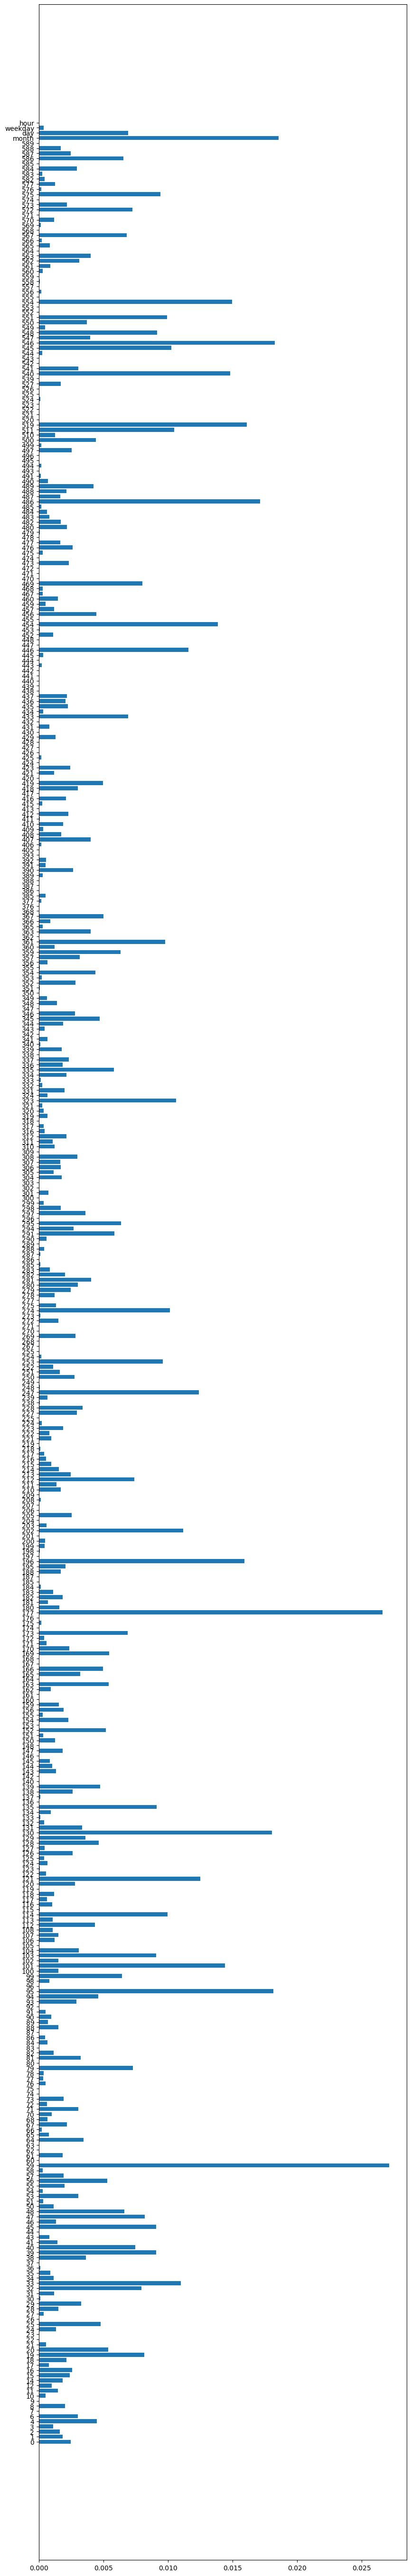

In [82]:
# 아래 결과값 다를 수 있음

**위 시각화 결과값중 plot_importance의 결과값은 어떻게 해석할 수 있으며 이를 프로젝트 목적에 어떻게 활용가능한가요?**

In [ ]:
# TEXT HERE


# 수고하셨습니다!!